In [19]:
%%cython
cdef extern from "tzap.c":
    long double get_c()
    long double get_multiplier_E()
    long double get_dr()
    void set_dr(long double dr)
    void set_r_finish(long double r_finish)
    int calc_tzap(long double q, long double t, long double R0, long double r0, long double v0, long double a0, long double theta, long double r_min, long double * t2, long double * r1)
    int get_r_common(long double q, long double t, long double r0, long double v0, long double a0, long double r_min, long double * r)
    long double get_v_common(long double q, long double t, long double v0, long double a0)
    int get_capacity_common(long double q, long double t, long double r0_p, long double v0_p, long double a0_p, long double r0_n, long double v0_n, long double a0_n, long double r_min, long double * r_pos, long double * r_neg, long double * capacity, long double * energy)


cdef extern from "integrate.c":
    int integrand_phi_and_E(long double q, long double t, long double R0, long double r0, long double v0, long double a0, long double theta, long double * pE_minus_grad_phi_R0, long double *pE_minus_1_c_dA_dt_R0, long double *pE, long double r_min, long double *phi, long double *A)
    int integral_phi(long double q, long double t, long double R0, long double r0, long double v0, long double a0, long double r_min, long double * result)
    int integral_phi_and_E(long double q, long double t, long double R0, long double r0, long double v0, long double a0, long double * pE_minus_grad_phi_R0, long double *pE_minus_1_c_dA_dt_R0, long double *pE, long double r_min, long double *phi, long double *A)
    int dbl_integral_phi_and_E(long double q, long double t, long double R0, long double r0_min, long double v0_min, long double a0_min, long double r0_max, long double v0_max, long double a0_max, long double * pE_minus_grad_phi_R0, long double * pE, long double *pE_minus_1_c_dA_dt_R0, long double r_min, long double *phi, long double *A)

cdef extern from "calc.c":
    int do_v1_calc(long double q, long double m_pos, long double m_neg, long double r0_pos, long double r0_neg, long double v0_pos, long double v0_neg, long double a0_pos, long double a0_neg, long double t_a0)

def get_light_veloncity():
    cdef long double c = get_c()
    return c

def get_electric_field_multiplier():
    cdef long double m = get_multiplier_E()
    return m

def get_dr_py():
    cdef long double dr = get_dr()
    return dr

def set_dr_py(dr):
    set_dr(dr)

def set_r_finish_py(r_finish):
    set_r_finish(r_finish)

def tzap(q, t, R0, r0, v0, a0, theta, r_min):
    cdef long double t2;
    cdef long double r1;
    cdef error = calc_tzap(q, t, R0, r0, v0, a0, theta, r_min, &t2, &r1)
    return (t2, r1)

def phi_and_E_integrand(q, t, R0, r0, v0, a0, theta, r_min):
    cdef long double E1
    cdef long double E2
    cdef long double E
    cdef long double phi
    cdef long double A
    cdef error = integrand_phi_and_E(q, t, R0, r0, v0, a0, theta, &E1, &E2, &E, r_min, &phi, &A)
    if abs(E1+E2-E)>1e-3:
        print ("abs(E1+E2-E)", abs(E1+E2-E))
        #raise Exception("abs(E1+E2-E)>1e-3  = " + str(abs(E1+E2-E)))
    return (phi, A, E1, E2, E, error)

def phi_and_E_lw(q, t, R0, r0, v0, a0, r_min):
    cdef long double E1
    cdef long double E2
    cdef long double E
    cdef long double phi
    cdef long double A
    cdef error = integral_phi_and_E(q, t, R0, r0, v0, a0, &E1, &E2, &E, r_min, &phi, &A)
    return (phi, A, E1, E2, E, error)

def phi_lw(q, t, R0, r0, v0, a0, r_min):
    cdef long double result;
    cdef error = integral_phi(q, t, R0, r0, v0, a0, r_min, &result)
    return result

def phi_and_E_lw(q, t, R0, r0, v0, a0, r_min):
    cdef long double E1
    cdef long double E2
    cdef long double E
    cdef long double phi
    cdef long double A
    cdef error = integral_phi_and_E(q, t, R0, r0, v0, a0, &E1, &E2, &E, r_min, &phi, &A)
    return (phi, A, E1, E2, E, error)

def dbl_phi_and_E_lw(q, t, R0, r0_min, v0_min, a0_min, r0_max, v0_max, a0_max, r_min):
    cdef long double E1
    cdef long double E2
    cdef long double E
    cdef long double phi
    cdef long double A
    cdef error = dbl_integral_phi_and_E(q, t, R0, r0_min, v0_min, a0_min, r0_max, v0_max, a0_max, &E1, &E2, &E, r_min, &phi, &A)
    return (phi, A, E1, E2, E, error)

def v1_calc(q, m_pos, m_neg, r0_pos, r0_neg, v0_pos, v0_neg, a0_pos, a0_neg, t_a0):
    cdef error = do_v1_calc(q, m_pos, m_neg, r0_pos, r0_neg, v0_pos, v0_neg, a0_pos, a0_neg, t_a0)

def get_r_of_sphere(q, t, r0, v0, a0, r_min):
    cdef long double r
    cdef err = get_r_common(q, t, r0, v0, a0, r_min, &r)
    return r

def get_capacity_of_spherical_capacitor(q, t, r0_p, v0_p, a0_p, r0_n, v0_n, a0_n, r_min):
    cdef long double r_pos
    cdef long double r_neg
    cdef long double capacity
    cdef long double energy
    cdef err = get_capacity_common(q, t, r0_p, v0_p, a0_p, r0_n, v0_n, a0_n, r_min, &r_pos, &r_neg, &capacity, &energy)
    return (r_pos, r_neg, capacity, energy)

def get_v_of_sphere(q, t, v0, a0):
    cdef long double v = get_v_common(q, t, v0, a0)
    return v

In [20]:
def float_formatting(float_value):
    print ("float_value =", float_value)
    decimal_part = abs(float_value - int(float_value))
    print ("decimal_part =", decimal_part)
    if 0 == decimal_part:
        digits_after_point = 0
    else:
        #print "decimal_part=", decimal_part
        print ("log(decimal_part)=", log(decimal_part))
        print ("log(10.0)=", log(10.0))
        print ("log(decimal_part)/log(10.0)=", log(decimal_part)/log(10.0))
        print ("floor(log(decimal_part)/log(10.0)=", floor(log(decimal_part)/log(10.0)))
        digits_after_point = 2 - floor(log(decimal_part)/log(10.0))
    print ("digits_after_point=", digits_after_point)
    format_string_float_value = "str_float_value = '%1." + str(digits_after_point) + "f' % (" + str(float_value) + ")"
    format_string = "{:1." + str(digits_after_point) + "f}"
    format_string = "%1." + str(digits_after_point) + "f"
    print ("format_string =", format_string)
    res = format_string.format(float_value)
    res = format_string % (float_value)
    print ("res =", res)
    return res

def suffix(t, r0, a0):
    return "_r0=" + float_formatting(r0) + "_a0=" + float_formatting(a0) + "_t=" + float_formatting(t)

def suffix_trvaR(t, r0, v0, a0, R0):
    return "_R0=" + float_formatting(R0) + "_r0=" + float_formatting(r0) + "_v0=" + float_formatting(v0) + "_a0=" + float_formatting(a0) + "_t=" + float_formatting(t)



In [21]:
c = get_light_veloncity()

In [23]:
# Data for plotting of t_zap
def plot_spherical_capacitor_tzap_theta(q, t, min_R0, max_R0, step_R0, r0, v0, a0):
    npoints = 180
    thetas = np.arange(0*pi/npoints, npoints*pi/npoints + 1*pi/npoints, 1*pi/npoints)
    t_zap_data = [ (theta_i, tzap(q, t, R0_i, r0, v0, a0, theta_i, r_min)) for theta_i in thetas for R0_i in np.arange(min_R0, max_R0, step_R0)]

    p = list_plot (t_zap_data)
    p.show(title="results/spherical_oscillator_tzap_theta" + suffix(t, r0, a0) + ".png")

# Data for plotting of t_zap
def plot_spherical_capacitor_tzap_R0(q, t, min_R0, max_R0, step_R0, r0, v0, a0):
    npoints = 2
    thetas = np.arange(0*pi/npoints, npoints*pi/npoints + 1*pi/npoints, 1*pi/npoints)
    t_zap_data = [ (R0_i, tzap(q, t, R0_i, r0, v0, a0, theta_i, r_min)) for theta_i in thetas for R0_i in np.arange(min_R0, max_R0, step_R0)]

    p = list_plot (t_zap_data)
    p.show(title="results/spherical_oscillator_tzap_R0" + suffix(t, r0, a0) + ".png")


def plot_spherical_capacitor_phi_R0(q, t, min_R0, max_R0, step_R0):
    phi_lw_data = [ (R0_i, phi_lw(-q, t, R0_i, Rneg, 0, 0, r_min) + phi_lw(q, t, R0_i, Rpos, 0, 0, r_min)) for R0_i  in np.arange(min_R0, max_R0, step_R0) ]
    p = list_plot (phi_lw_data)
    p.show(title="results/spherical_capacitor_phi" + "_Rneg=" + str(Rneg) + "_Rpos= " + str(Rpos) + ".png")


def plot_spherical_oscillator_phi_R0(q, t, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min_neg, Rpos, v0pos, a0pos, r_min_pos ):
    phi_lw_data = [ (R0_i, phi_lw(-q, t, R0_i, Rneg, v0neg, a0neg, r_min_neg) + phi_lw(q, t, R0_i, Rpos, v0pos, a0pos, r_min_pos)) for R0_i in np.arange(min_R0, max_R0, step_R0) ]

    p = list_plot (phi_lw_data)
    pname = "results/spherical_oscillator_phi" + \
        "_Rneg=" + float_formatting(Rneg) + "_Rpos= " + float_formatting(Rpos) + \
        "_v0neg=" + float_formatting(v0neg) + "_v0pos=" + float_formatting(v0pos) + \
        "_a0neg=" + float_formatting(a0neg) + "_a0pos=" + float_formatting(a0pos) + \
        "c=" + float_formatting(c) + "_t=" + float_formatting(t) + \
        ".png"
    print (pname)
    p.show(title=pname)


def plots_spherical_oscillator_phi_R0(q, t1, t2, dt, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min_neg, Rpos, v0pos, a0pos, r_min_pos):
    phi_lw_data = [ (R0_i, phi_lw(-q, t_i, R0_i, Rneg, v0neg, a0neg, r_min) + phi_lw(q, t_i, R0_i, Rpos, v0pos, a0pos, r_min)) for R0_i in np.arange(min_R0, max_R0, step_R0) for t_i in np.arange(t1, t2, dt)]

    p = list_plot (phi_lw_data)
    pname = "results/spherical_oscillators_phi" + \
        "_Rneg=" + float_formatting(Rneg) + "_Rpos= " + float_formatting(Rpos) + \
        "_v0neg=" + float_formatting(v0neg) + "_v0pos=" + float_formatting(v0pos) + \
        "_a0neg=" + float_formatting(a0neg) + "_a0pos=" + float_formatting(a0pos) + \
        "c=" + float_formatting(c) + "_t=" + float_formatting(t1) + ".." + float_formatting(dt) + ".." + float_formatting(t2) + \
        ".png"
    print (pname)
    p.show(title=pname)


In [24]:
#dir = os.getcwd()  + "/results"
#print ("dir = ", dir)

#try:
#    os.mkdir(dir)
#except:
#    pass

q = 1
r_min = 0.1
t = 0

# Data for plotting of phi_lw of unmoved spherical capacitor
min_R0 = -5.0/3.0*c
max_R0 = 5.0/3.0*c
step_R0 = 0.25/3.0*c
Rneg=2.0/3.0*c
Rpos=1.0/3.0*c

*pR_zap = 186223890.428632
R_zap = 186223890.428631
dR_zap = 2.124580e-08
r_zap = 323839049.744375
*pR_zap = 185966116.616563
R_zap = 185966116.616563
dR_zap = 3.183959e-08
r_zap = 323670814.276408
*pR_zap = 185713763.414612
R_zap = 185713763.414612
dR_zap = 2.651359e-08
r_zap = 323506188.171881
*pR_zap = 185466824.257821
R_zap = 185466824.257821
dR_zap = 2.657180e-08
r_zap = 323345167.143392
*pR_zap = 185225292.715088
R_zap = 185225292.715088
dR_zap = 1.656008e-08
r_zap = 323187746.992968
*pR_zap = 184989162.489451
R_zap = 184989162.489451
dR_zap = 3.402238e-08
r_zap = 323033923.612256
*pR_zap = 184758427.418385
R_zap = 184758427.418385
dR_zap = 1.052103e-08
r_zap = 322883692.982712
*pR_zap = 184533081.474068
R_zap = 184533081.474068
dR_zap = 2.860907e-08
r_zap = 322737051.175773
*pR_zap = 184313118.763659
R_zap = 184313118.763659
dR_zap = 2.197339e-08
r_zap = 322593994.353039
*pR_zap = 184098533.529558
R_zap = 184098533.529558
dR_zap = 1.586159e-08
r_zap = 322454518.766438
*pR_zap = 

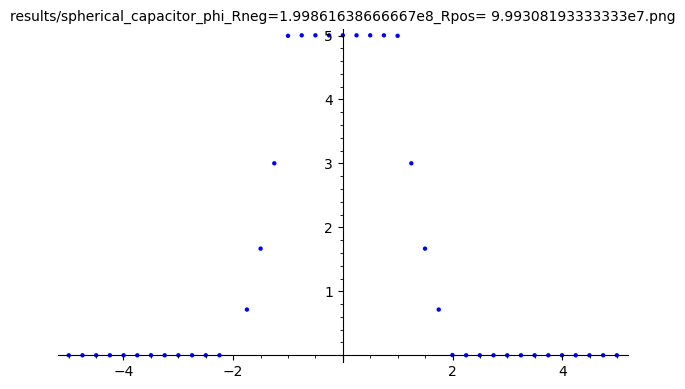

In [25]:
plot_spherical_capacitor_phi_R0(q, t, min_R0, max_R0, step_R0)

 0.000000 R_lw_zap = 274809753.166666 t_zap = -9.166667e-01
100 0.314159 R_lw_zap = 291216071.340986 t_zap = -9.713923e-01
200 0.628319 R_lw_zap = 334300735.881227 t_zap = -1.115107e+00
300 0.942478 R_lw_zap = 392087840.002721 t_zap = -1.307864e+00
400 1.256637 R_lw_zap = 454560869.643139 t_zap = -1.516252e+00
500 1.570796 R_lw_zap = 515031654.207310 t_zap = -1.717961e+00
600 1.884956 R_lw_zap = 569113016.421440 t_zap = -1.898357e+00
700 2.199115 R_lw_zap = 613825981.360383 t_zap = -2.047503e+00
800 2.513274 R_lw_zap = 647115312.490986 t_zap = -2.158544e+00
900 2.827433 R_lw_zap = 667613967.397147 t_zap = -2.226920e+00
1000 3.141593 R_lw_zap = 674533030.499999 t_zap = -2.250000e+00
0 0.000000 R_lw_zap = 374740572.499999 t_zap = -1.250000e+00
100 0.314159 R_lw_zap = 380885411.329319 t_zap = -1.270497e+00
200 0.628319 R_lw_zap = 398181852.255009 t_zap = -1.328192e+00
300 0.942478 R_lw_zap = 423717752.281946 t_zap = -1.413370e+00
400 1.256637 R_lw_zap = 453853598.162699 t_zap = -1.513893e

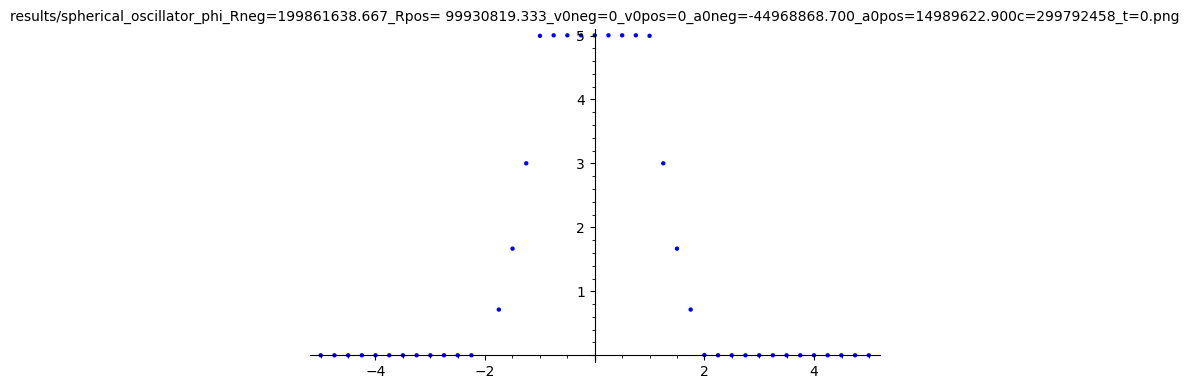

float_value = 9.99308193333333e7
decimal_part = 0.333333328366280
log(decimal_part)= -1.09861230356927
log(10.0)= 2.30258509299405
log(decimal_part)/log(10.0)= -0.477121261191154
floor(log(decimal_part)/log(10.0)= -1
digits_after_point= 3
format_string = %1.3f
res = 99930819.333
float_value = 1.49896229000000e7
decimal_part = 0.900000000372529
log(decimal_part)= -0.105360515243905
log(10.0)= 2.30258509299405
log(decimal_part)/log(10.0)= -0.0457574903809115
floor(log(decimal_part)/log(10.0)= -1
digits_after_point= 3
format_string = %1.3f
res = 14989622.900
float_value = 0
decimal_part = 0
digits_after_point= 0
format_string = %1.0f
res = 0


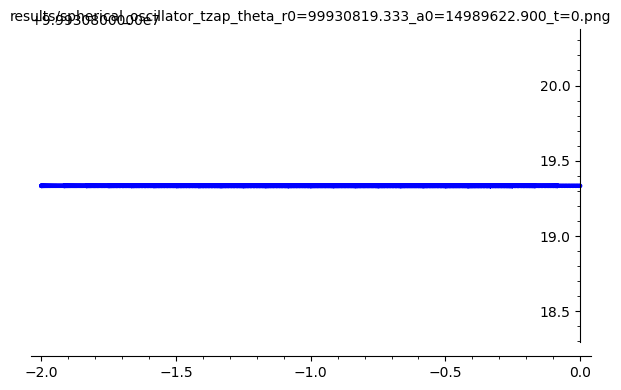

float_value = 9.99308193333333e7
decimal_part = 0.333333328366280
log(decimal_part)= -1.09861230356927
log(10.0)= 2.30258509299405
log(decimal_part)/log(10.0)= -0.477121261191154
floor(log(decimal_part)/log(10.0)= -1
digits_after_point= 3
format_string = %1.3f
res = 99930819.333
float_value = 1.49896229000000e7
decimal_part = 0.900000000372529
log(decimal_part)= -0.105360515243905
log(10.0)= 2.30258509299405
log(decimal_part)/log(10.0)= -0.0457574903809115
floor(log(decimal_part)/log(10.0)= -1
digits_after_point= 3
format_string = %1.3f
res = 14989622.900
float_value = 0
decimal_part = 0
digits_after_point= 0
format_string = %1.0f
res = 0


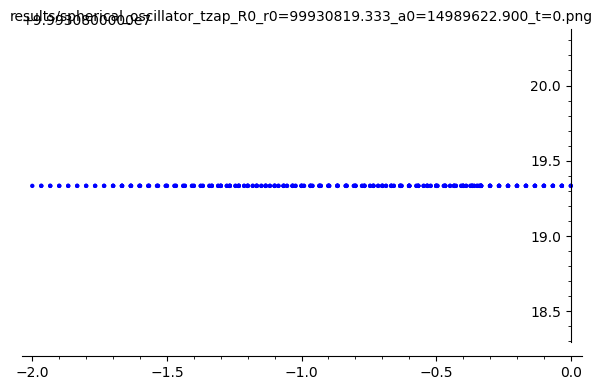

In [26]:
# Data for plotting of p0.5hi_lw of spherical oscillator with expanding negative sphere
v0pos = 0
v0neg = 0

a0pos = 0.05*c
a0neg = -0.15*c
plot_spherical_oscillator_phi_R0(q, t, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min, Rpos, v0pos, a0pos, r_min )
plot_spherical_capacitor_tzap_theta(q, t, min_R0, max_R0, step_R0, Rpos, v0pos, a0pos)
step_R0 = 0.1/3.0*c
plot_spherical_capacitor_tzap_R0(q, t, min_R0, max_R0, step_R0, Rpos, v0pos, a0pos)


In [ ]:
t1 = 0.0
dt = 1.0
t2 = 5.0
plots_spherical_oscillator_phi_R0(q, t1, t2, dt, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min, Rpos, v0pos, a0pos, r_min)


In [ ]:





a0pos = 0
a0neg = 0
t = 0

# Расчёт по формуле 19 скалярного потенциала Лиенара Вихерта (пока что без учёта запаздывания) для двух обкладок сферического конденсатора, в котором внешняя отрицательная обкладка разлетается наружу со скоростью 1.0/3.0, а внутренняя обкладка покоится, имеет вид.
v0pos = 0.0
v0neg = 1.0/3.0*c
#plot_spherical_oscillator_phi_R0(q, t, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min, Rpos, v0pos, a0pos, r_min )

# Скалярный потенциал Лиенара Вихерта (без учёта запаздывания) сферического конденсатора того же размера, в котором внешняя отрицательная обкладка схлопывается внутрь с той же скоростью  -1.0/3.0. Внутри внутренней положительной сферы появляется потенциальная яма для положительных зарядов.
v0pos = 0.0
v0neg = -1.0/3.0*c
#plot_spherical_oscillator_phi_R0(q, t, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min, Rpos, v0pos, a0pos, r_min )

# Результат расчёта по формуле 116 скалярного потенциала Лиенара Вихерта c учётом запаздывания сферического конденсатора, в котором обе обкладки - как внешняя отрицательная  так и внутренняя положительная разлетаются наружу. Скорости обкладок  и. Начальная фаза центрально-симметричного взрыва. Для сравнения на том же графике приведён результат расчёта по формуле 19 без учёта запаздывания
v0pos = 1.0/6.0*c
v0neg = 1.0/3.0*c

#for t in np.arange(t1, t2, dt):
#    plot_spherical_oscillator_phi_R0(q, t, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min, Rpos, v0pos, a0pos, r_min )
#plots_spherical_oscillator_phi_R0(q, t1, t2, dt, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min, Rpos, v0pos, a0pos, r_min)

# Скалярный потенциал Лиенара Вихерта c учётом и без учёта запаздывания сферического конденсатора, в котором положительная обкладка разлетается наружу, а отрицательная обкладка схлопывается внутрь. Обе обкладки движутся навстречу друг другу. Скорости обкладок  и. Потенциальная яма внутри положительной обкладки при учёте запаздывания оказывается глубже, чем без учёта. Интересный момент, что при учёте запаздывания излом потенциальной кривой в области внутренней положительно заряженной вкладки практически полностью исчёз.
v0pos = 1.0/3.0*c
v0neg = -2.0/3.0*c
dt = 0.1
t2 = 0.5
for t in np.arange(t1, t2, dt):
    plot_spherical_oscillator_phi_R0(q, t, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min, Rpos, v0pos, a0pos, r_min )
plots_spherical_oscillator_phi_R0(q, t1, t2, dt, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min, Rpos, v0pos, a0pos, r_min)

t = 0
Rneg=1.0/3.0*c
Rpos=1.0/3.0*c
v0pos = 0
v0neg = 0
a0pos = 0.001*c
a0neg = 0.1*c
#plot_spherical_oscillator_phi_R0(q, t, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min, Rpos, v0pos, a0pos, r_min )
#plots_spherical_oscillator_phi_R0(q, t1, t2, dt, min_R0, max_R0, step_R0, Rneg, v0neg, a0neg, r_min, Rpos, v0pos, a0pos, r_min)

